## Goal - To analyse CO2 emission of various countries and predict CO2 emission of future years

#### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#### Load Dataset

In [32]:
data=pd.read_csv("co2_emission.csv")

In [33]:
data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [34]:
data.shape

(20853, 4)

In [35]:
data.Entity.nunique()

233

#### There are 233 Country data.

### We will be the doing analysis on Asian countries for this we need one more dataset which has Regions and Subregions

In [36]:
regions=pd.read_csv("continents2.csv")

In [37]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#### We don't need all the columns we will extract the region, sub-region and alpha-3 columns

In [38]:
continent=pd.read_csv('continents2.csv',usecols=['alpha-3','region','sub-region'])

In [39]:
continent.head()

,alpha-3,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [40]:
continent.rename(columns={'alpha-3':'Code','region':'Region','sub-region':'SubRegion'},inplace=True)
continent.head()

,Code,Region,SubRegion
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


### Merging the two datasets

In [41]:
merge_data=pd.merge(data,continent,how='left',on='Code')
merge_data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes ),Region,SubRegion
0,Afghanistan,AFG,1949,14656.0,Asia,Southern Asia
1,Afghanistan,AFG,1950,84272.0,Asia,Southern Asia
2,Afghanistan,AFG,1951,91600.0,Asia,Southern Asia
3,Afghanistan,AFG,1952,91600.0,Asia,Southern Asia
4,Afghanistan,AFG,1953,106256.0,Asia,Southern Asia


In [42]:
merge_data.shape

(20853, 6)

## Data Cleaning

In [43]:
merge_data.isnull().sum()

Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
Region                            2606
SubRegion                         2606
dtype: int64

In [44]:
merge_data.dropna()

,Entity,Code,Year,Annual CO₂ emissions (tonnes ),Region,SubRegion
0,Afghanistan,AFG,1949,14656.00,Asia,Southern Asia
1,Afghanistan,AFG,1950,84272.00,Asia,Southern Asia
2,Afghanistan,AFG,1951,91600.00,Asia,Southern Asia
3,Afghanistan,AFG,1952,91600.00,Asia,Southern Asia
4,Afghanistan,AFG,1953,106256.00,Asia,Southern Asia
...,...,...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29,Africa,Sub-Saharan Africa
20849,Zimbabwe,ZWE,2014,11866348.41,Africa,Sub-Saharan Africa
20850,Zimbabwe,ZWE,2015,10907603.94,Africa,Sub-Saharan Africa
20851,Zimbabwe,ZWE,2016,9932649.88,Africa,Sub-Saharan Africa


## Data Visualization

### Increase in Annual CO2 emission with time

Text(0.5, 1.0, ' Increase in Annual CO2 emission with time')

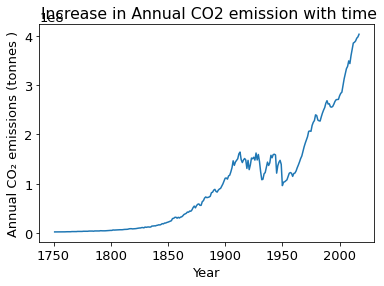

In [45]:
World=merge_data[['Year','Annual CO₂ emissions (tonnes )']]
World=World.groupby('Year').mean().reset_index()
sns.lineplot(x='Year',y='Annual CO₂ emissions (tonnes )',data=World)
plt.title(' Increase in Annual CO2 emission with time')

Text(0.5, 1.0, ' Increase in Annual CO2 emission with time')

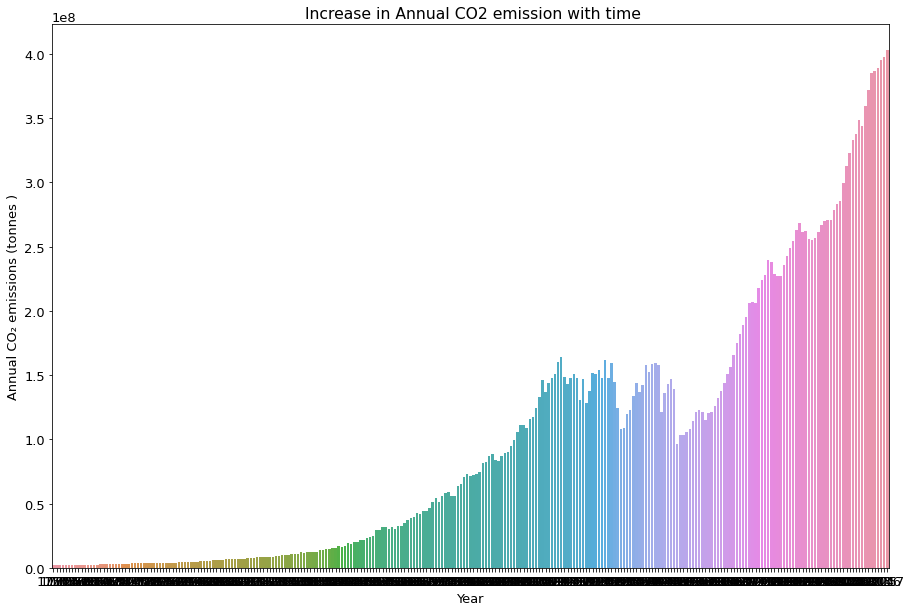

In [46]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Year',y='Annual CO₂ emissions (tonnes )',data=World)
plt.title(' Increase in Annual CO2 emission with time')

## CO2 emission on basis of Regions

Text(0.5, 1.0, 'CO2 emission on basis of Regions')

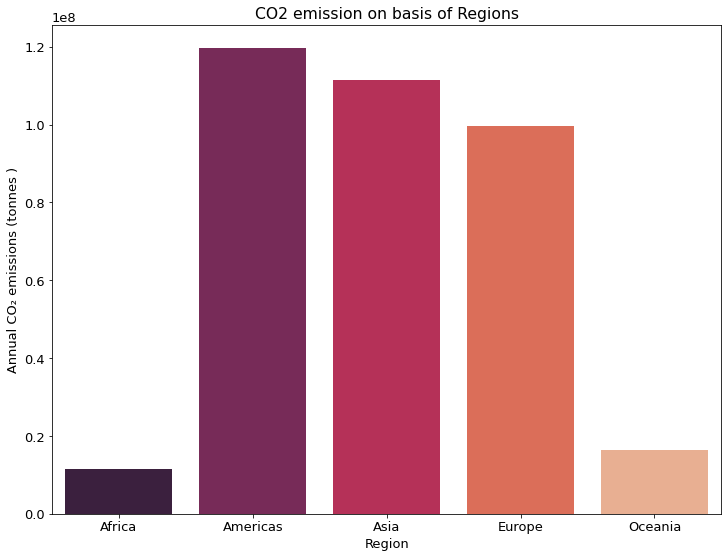

In [47]:
Region=merge_data[['Region','Annual CO₂ emissions (tonnes )']]
Region=Region.groupby('Region').mean().reset_index()
plt.subplots(figsize=(12,9))
sns.barplot(x='Region',y='Annual CO₂ emissions (tonnes )',data=Region, palette='rocket')
plt.title('CO2 emission on basis of Regions')

In [48]:
plt.rcParams['font.size'] = 13

Text(0.5, 1.0, 'CO2 emission on basis of Regions')

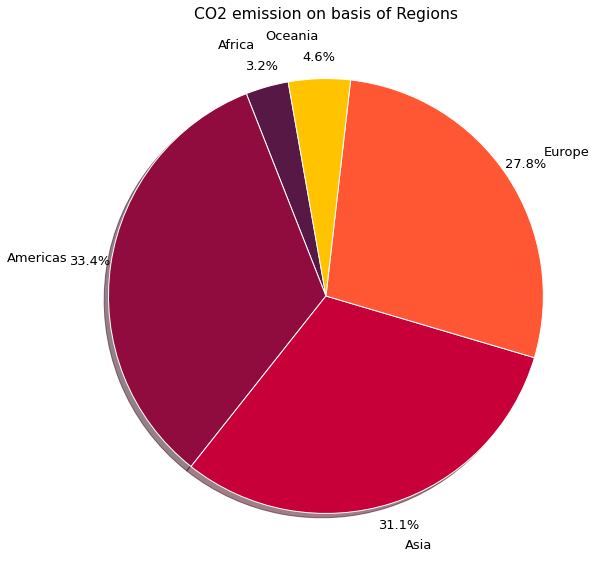

In [49]:
Region=merge_data[['Region','Annual CO₂ emissions (tonnes )']]
Region=Region.groupby('Region').mean().reset_index()
plt.subplots(figsize=(15,10))
colors = ['#581845', '#900C3F', '#C70039', '#FF5733','#FFC300']
plt.pie(Region['Annual CO₂ emissions (tonnes )'],labels=Region['Region'], colors=colors,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
autopct='%1.1f%%', shadow=True, startangle=100,pctdistance=1.1, labeldistance=1.2)
plt.title('CO2 emission on basis of Regions')

### America is at the top in emission of CO2
###               

## Sub Region wise emission of CO2

Text(0.5, 1.0, 'CO2 emission on basis of SubRegions')

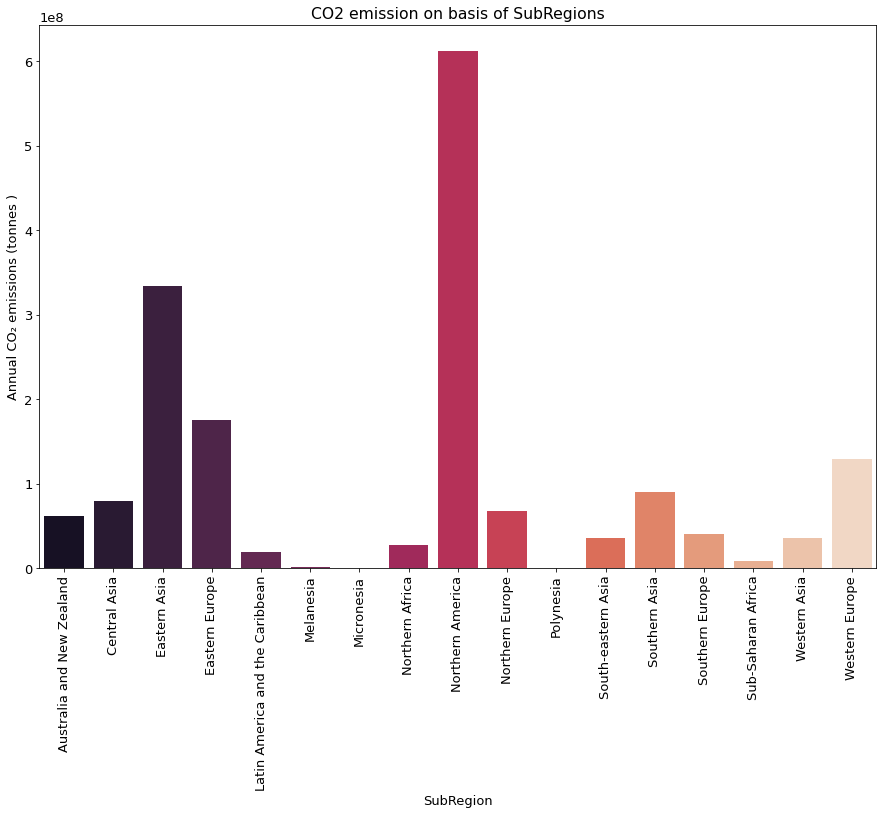

In [50]:
SubRegion=merge_data[['SubRegion','Annual CO₂ emissions (tonnes )']]
SubRegion=SubRegion.groupby('SubRegion').mean().reset_index()
plt.subplots(figsize=(15,10))
sns.barplot(x='SubRegion',y='Annual CO₂ emissions (tonnes )',data=SubRegion, palette='rocket')
plt.xticks(rotation=90)
plt.title('CO2 emission on basis of SubRegions')

### North America is at top
##     

## Top 10 countries 

In [79]:
Top=merge_data.groupby('Entity').agg({'Annual CO₂ emissions (tonnes )':'mean'}).reset_index()

In [80]:
Top.columns=['Entity','AVG_CO2']

In [81]:
top10=Top.sort_values('AVG_CO2',ascending=False)[:10]
top20=Top.sort_values('AVG_CO2',ascending=False)[:20]

In [82]:
country={'Asia and Pacific (other)','Europe (other)','Americas (other)','EU-28'}

In [83]:
top1=top20

In [97]:
top20

,Entity,AVG_CO2
229,World,5.899791e+09
173,Russia,1.704900e+09
222,United States,1.495799e+09
45,China,7.879390e+08
219,Ukraine,4.372269e+08
107,Japan,4.153641e+08
82,Germany,4.007329e+08
221,United Kingdom,2.886556e+08
138,Middle East,2.264915e+08
194,South Korea,2.162550e+08


In [93]:
index_value=top1[top1['Entity']=='EU-28'].index
top1.drop(index_value,inplace=True)
#top1.drop([top1['Entity']=='Europe (other)'].index,inplace=True)
#top1.drop([top1['Entity']=='Americas (other)'].index,inplace=True)
#top1.drop([top1['Entity']=='EU-28'].index,inplace=True)

In [95]:
top10=top1.sort_values('AVG_CO2',ascending=False)[1:11]

In [96]:
top10

,Entity,AVG_CO2
173,Russia,1.704900e+09
222,United States,1.495799e+09
45,China,7.879390e+08
219,Ukraine,4.372269e+08
107,Japan,4.153641e+08
82,Germany,4.007329e+08
221,United Kingdom,2.886556e+08
138,Middle East,2.264915e+08
194,South Korea,2.162550e+08
109,Kazakhstan,2.084850e+08


Text(0.5, 1.0, 'Top 10 CO2 emitting countries')

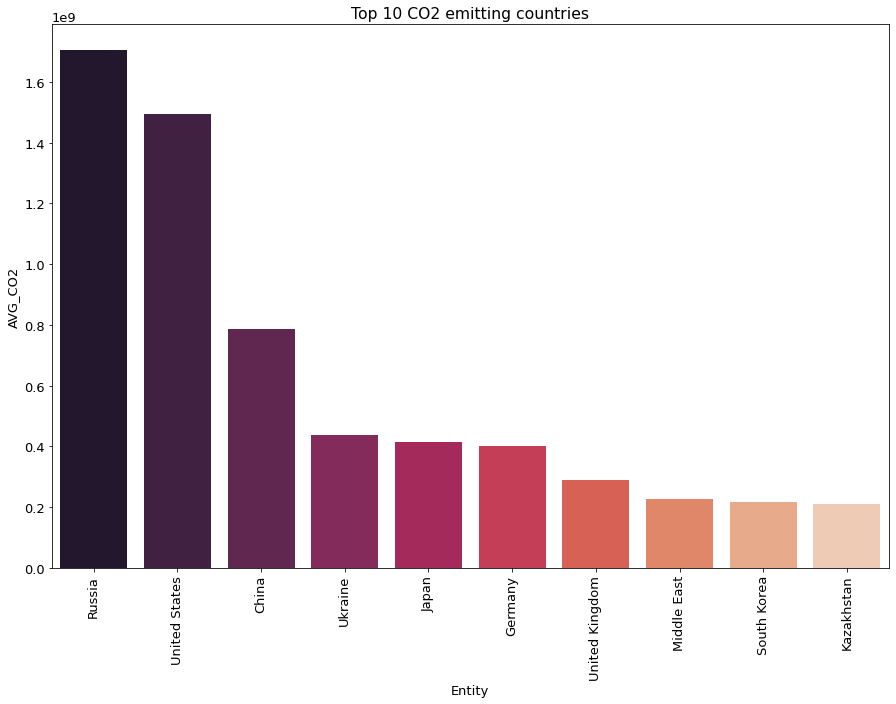

In [98]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Entity',y='AVG_CO2',data=top10, palette='rocket')
plt.xticks(rotation=90)
plt.title('Top 10 CO2 emitting countries')

In [28]:
dff=merge_data
dff.columns=['Entity', 'Code', 'Year', 'CO₂emissions', 'Region',
       'SubRegion']

In [105]:

t=dff.groupby("Entity")['CO₂emissions'].mean().sort_values(ascending=False)[1:11]

In [106]:
tt=t.to_frame().reset_index()

In [107]:
tt.columns
tt

,Entity,CO₂emissions
0,Russia,1.704900e+09
1,United States,1.495799e+09
2,EU-28,1.321567e+09
3,China,7.879390e+08
4,Asia and Pacific (other),6.668812e+08
5,Europe (other),5.900382e+08
6,Ukraine,4.372269e+08
7,Japan,4.153641e+08
8,Germany,4.007329e+08
9,Americas (other),3.694425e+08


Text(0.5, 1.0, 'Top 10 CO2 emitting countries')

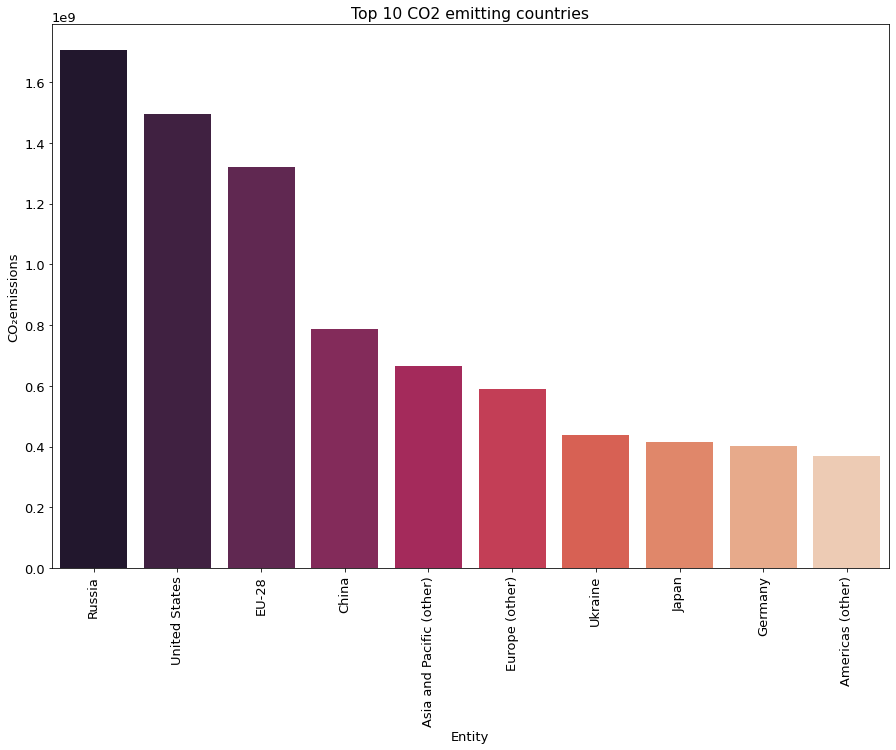

In [108]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Entity',y='CO₂emissions',data=tt, palette='rocket')
plt.xticks(rotation=90)
plt.title('Top 10 CO2 emitting countries')

### Selecting Asian Countries

In [109]:
Asia=merge_data[merge_data['Region'] == 'Asia']
Asia.head()

,Entity,Code,Year,CO₂emissions,Region,SubRegion
0,Afghanistan,AFG,1949,14656.0,Asia,Southern Asia
1,Afghanistan,AFG,1950,84272.0,Asia,Southern Asia
2,Afghanistan,AFG,1951,91600.0,Asia,Southern Asia
3,Afghanistan,AFG,1952,91600.0,Asia,Southern Asia
4,Afghanistan,AFG,1953,106256.0,Asia,Southern Asia


In [110]:
Asia.shape

(4191, 6)

In [111]:
Asia.Entity.nunique()

51

In [112]:
A1=Asia.groupby("Entity")['CO₂emissions'].mean().sort_values(ascending=False)[0:10]
A1=A1.to_frame().reset_index()
A1

,Entity,CO₂emissions
0,China,7.879390e+08
1,Japan,4.153641e+08
2,South Korea,2.162550e+08
3,Kazakhstan,2.084850e+08
4,India,1.896792e+08
5,Saudi Arabia,1.709089e+08
6,Iran,1.442233e+08
7,Uzbekistan,1.022760e+08
8,Indonesia,9.635869e+07
9,Thailand,8.349085e+07


Text(0.5, 1.0, 'Top 10 CO2 emitting  Asian countries')

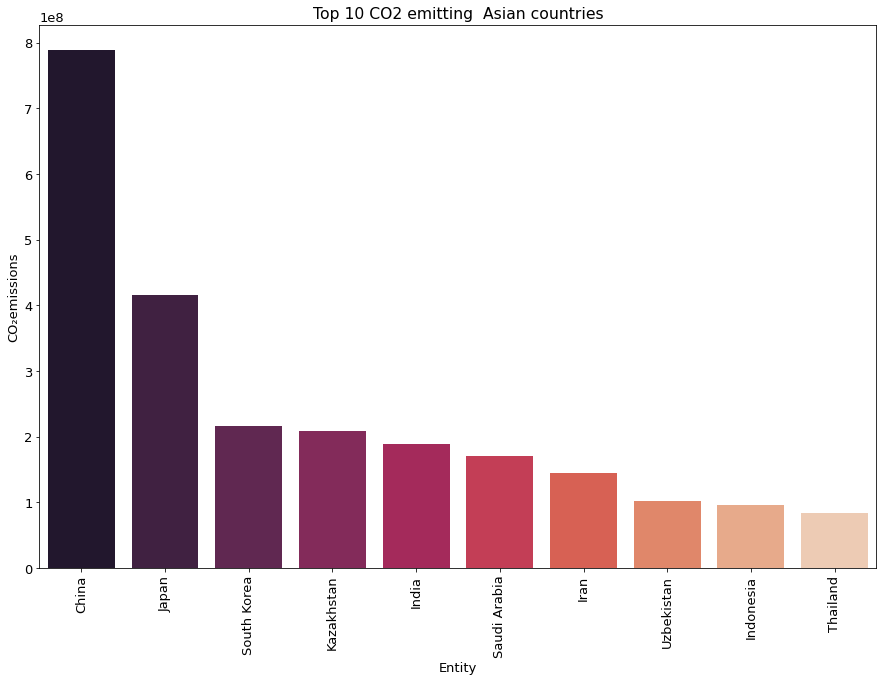

In [116]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Entity',y='CO₂emissions',data=A1, palette='rocket')
plt.xticks(rotation=90)
plt.title('Top 10 CO2 emitting  Asian countries')